In [8]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Training settings
batch_size = 64

# MNIST Dataset
#train_dataset = datasets.MNIST(root='./mnist_data/',
#                               train=True,
#                               transform=transforms.ToTensor(),
#                               download=True)
#
#test_dataset = datasets.MNIST(root='./mnist_data/',
#                              train=False,
#                              transform=transforms.ToTensor())

#Load as panda
pd_train_dataset = pd.read_csv('./kaggle_data/train.csv')
pd_test_dataset = pd.read_csv('./kaggle_data/test.csv')


(28000, 784)


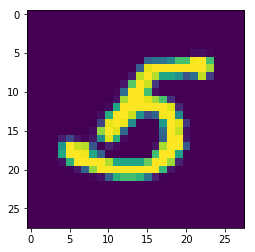

In [5]:
image = np.array(pd_train_dataset.iloc[128,1:])
plt.imshow(image.reshape(28,28)) #displaying random image from the dataset
print (pd_test_dataset.shape)

In [14]:
PD_split_train, PD_split_val = train_test_split(pd_train_dataset, test_size = 0.06)

In [15]:
print (PD_split_train.shape)
print (PD_split_val.shape)

(39480, 785)
(2520, 785)


In [16]:
class mnist_dataset_train(Dataset):
    """ train mnist dataset."""

    # Initialize your data, download, etc.
    def __init__(self):

        #Train data
        self.len = pd_train_dataset.shape[0]
        
        self.pt_x_data = torch.from_numpy(np.array(pd_train_dataset.iloc[:,1:].values, dtype='float')).float()
        self.y_data = np.array(pd_train_dataset.iloc[:, :1].values, dtype='float')
        self.pt_y_data = torch.from_numpy(self.y_data).long()
        
     
    def __getitem__(self, index):
        return self.pt_x_data[index], self.pt_y_data[index]

    def __len__(self):
        return self.len


train_dataset = mnist_dataset_train()
val_dataset = mnist_dataset_train()

In [ ]:
# Training settings
batch_size = 64

In [ ]:
NOT YET
#quickly scale x data
#train_dataset.pt_x_data = train_dataset.pt_x_data/255

print (train_dataset.pt_y_data[0,:])
print (train_dataset.pt_y_data.shape)
print (train_dataset.pt_x_data[0,:])
print (train_dataset.pt_x_data.shape)

In [17]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=0)

In [32]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Is this comment accurate???? might not need this Line [[[Flatten the data (n, 1, 28, 28)-> (n, 784)]]]]
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)


model = Net()

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [34]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        
        #print (output.shape)
        #print (target.shape)
        
        target = target.squeeze_()
        #print (target.shape)
        
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

In [35]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = Variable(data), Variable(target)
            output = model(data)
            # sum up batch loss
            
            ####test_loss += criterion(output, target).data[0]
            
            # get the index of the max
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

In [36]:
for epoch in range(1, 10):
    train(epoch)
    test()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/42000 (0%)]	Loss: 3.277580
Train Epoch: 1 [640/42000 (2%)]	Loss: 1.355396
Train Epoch: 1 [1280/42000 (3%)]	Loss: 0.696932
Train Epoch: 1 [1920/42000 (5%)]	Loss: 0.528544
Train Epoch: 1 [2560/42000 (6%)]	Loss: 0.359800
Train Epoch: 1 [3200/42000 (8%)]	Loss: 0.261648
Train Epoch: 1 [3840/42000 (9%)]	Loss: 0.442403
Train Epoch: 1 [4480/42000 (11%)]	Loss: 0.505910
Train Epoch: 1 [5120/42000 (12%)]	Loss: 0.210748
Train Epoch: 1 [5760/42000 (14%)]	Loss: 0.322526
Train Epoch: 1 [6400/42000 (15%)]	Loss: 0.293147
Train Epoch: 1 [7040/42000 (17%)]	Loss: 0.114539
Train Epoch: 1 [7680/42000 (18%)]	Loss: 0.439371
Train Epoch: 1 [8320/42000 (20%)]	Loss: 0.297833
Train Epoch: 1 [8960/42000 (21%)]	Loss: 0.427703
Train Epoch: 1 [9600/42000 (23%)]	Loss: 0.142156
Train Epoch: 1 [10240/42000 (24%)]	Loss: 0.190402
Train Epoch: 1 [10880/42000 (26%)]	Loss: 0.332765
Train Epoch: 1 [11520/42000 (27%)]	Loss: 0.322566
Train Epoch: 1 [12160/42000 (29%)]	Loss: 0.068438
Train Epoch: 1 [12800/42000

Train Epoch: 3 [19840/42000 (47%)]	Loss: 0.044219
Train Epoch: 3 [20480/42000 (49%)]	Loss: 0.063335
Train Epoch: 3 [21120/42000 (50%)]	Loss: 0.047086
Train Epoch: 3 [21760/42000 (52%)]	Loss: 0.062491
Train Epoch: 3 [22400/42000 (53%)]	Loss: 0.025825
Train Epoch: 3 [23040/42000 (55%)]	Loss: 0.111294
Train Epoch: 3 [23680/42000 (56%)]	Loss: 0.026892
Train Epoch: 3 [24320/42000 (58%)]	Loss: 0.018183
Train Epoch: 3 [24960/42000 (59%)]	Loss: 0.039827
Train Epoch: 3 [25600/42000 (61%)]	Loss: 0.007513
Train Epoch: 3 [26240/42000 (62%)]	Loss: 0.151126
Train Epoch: 3 [26880/42000 (64%)]	Loss: 0.104034
Train Epoch: 3 [27520/42000 (65%)]	Loss: 0.034055
Train Epoch: 3 [28160/42000 (67%)]	Loss: 0.004051
Train Epoch: 3 [28800/42000 (68%)]	Loss: 0.023559
Train Epoch: 3 [29440/42000 (70%)]	Loss: 0.073366
Train Epoch: 3 [30080/42000 (72%)]	Loss: 0.061080
Train Epoch: 3 [30720/42000 (73%)]	Loss: 0.038229
Train Epoch: 3 [31360/42000 (75%)]	Loss: 0.062825
Train Epoch: 3 [32000/42000 (76%)]	Loss: 0.070916


Train Epoch: 5 [39040/42000 (93%)]	Loss: 0.011486
Train Epoch: 5 [39680/42000 (94%)]	Loss: 0.036861
Train Epoch: 5 [40320/42000 (96%)]	Loss: 0.048068
Train Epoch: 5 [40960/42000 (97%)]	Loss: 0.098924
Train Epoch: 5 [41600/42000 (99%)]	Loss: 0.004457

Test set: Average loss: 0.0000, Accuracy: 41783/42000 (99%)

Train Epoch: 6 [0/42000 (0%)]	Loss: 0.008846
Train Epoch: 6 [640/42000 (2%)]	Loss: 0.063888
Train Epoch: 6 [1280/42000 (3%)]	Loss: 0.001810
Train Epoch: 6 [1920/42000 (5%)]	Loss: 0.001517
Train Epoch: 6 [2560/42000 (6%)]	Loss: 0.004853
Train Epoch: 6 [3200/42000 (8%)]	Loss: 0.008474
Train Epoch: 6 [3840/42000 (9%)]	Loss: 0.003395
Train Epoch: 6 [4480/42000 (11%)]	Loss: 0.040837
Train Epoch: 6 [5120/42000 (12%)]	Loss: 0.027890
Train Epoch: 6 [5760/42000 (14%)]	Loss: 0.021174
Train Epoch: 6 [6400/42000 (15%)]	Loss: 0.008426
Train Epoch: 6 [7040/42000 (17%)]	Loss: 0.000288
Train Epoch: 6 [7680/42000 (18%)]	Loss: 0.017502
Train Epoch: 6 [8320/42000 (20%)]	Loss: 0.017769
Train Epoch: 

Train Epoch: 8 [15360/42000 (37%)]	Loss: 0.002856
Train Epoch: 8 [16000/42000 (38%)]	Loss: 0.001312
Train Epoch: 8 [16640/42000 (40%)]	Loss: 0.019397
Train Epoch: 8 [17280/42000 (41%)]	Loss: 0.000612
Train Epoch: 8 [17920/42000 (43%)]	Loss: 0.006099
Train Epoch: 8 [18560/42000 (44%)]	Loss: 0.004778
Train Epoch: 8 [19200/42000 (46%)]	Loss: 0.000968
Train Epoch: 8 [19840/42000 (47%)]	Loss: 0.000719
Train Epoch: 8 [20480/42000 (49%)]	Loss: 0.000498
Train Epoch: 8 [21120/42000 (50%)]	Loss: 0.001893
Train Epoch: 8 [21760/42000 (52%)]	Loss: 0.000955
Train Epoch: 8 [22400/42000 (53%)]	Loss: 0.000580
Train Epoch: 8 [23040/42000 (55%)]	Loss: 0.001910
Train Epoch: 8 [23680/42000 (56%)]	Loss: 0.001862
Train Epoch: 8 [24320/42000 (58%)]	Loss: 0.000619
Train Epoch: 8 [24960/42000 (59%)]	Loss: 0.001374
Train Epoch: 8 [25600/42000 (61%)]	Loss: 0.004127
Train Epoch: 8 [26240/42000 (62%)]	Loss: 0.000555
Train Epoch: 8 [26880/42000 (64%)]	Loss: 0.001652
Train Epoch: 8 [27520/42000 (65%)]	Loss: 0.015969


In [30]:
#Test data
pt_x_data_test = torch.from_numpy(np.array(pd_test_dataset.iloc[:,:].values, dtype='float')).float()
#y_data_test = np.array(validation_set.loc[:, ['survived']].values, dtype='float')
#pt_y_data_test = torch.from_numpy(self.y_data_test).float()
print (pt_x_data_test.shape)

torch.Size([28000, 784])


In [37]:
#Run test set through
model.eval()
test_pred = model(pt_x_data_test)
#print (test_pred.shape)
#print (type(test_pred))
#print (test_pred[0,:])

pred = test_pred.data.max(1, keepdim=True)[1]
print (pred)

to_np = pred.detach().numpy()


#Add prediction col to test panda
#to_np = to_np.astype(int)
pd_test_dataset['Label'] = to_np


#Export to csv for submission

pd_test_dataset.index = np.arange(1, len(pd_test_dataset)+1)
pd_test_dataset.to_csv('CNN_1.csv', columns = ['Label'], index = True, index_label = 'ImageId')

tensor([[2],
        [0],
        [9],
        ...,
        [3],
        [9],
        [2]])
